In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../lab1/dataset_vk.csv')

In [3]:
df.head()

,political,sex,bdate,city,country,education,occupation,relation,military,people_main,...,activities,interests,music,movies,tv,books,about,inspired_by,religion,posts
0,liberal,male,not specified,Киев,Украина,0,university,5,specified,intelligence and creativity,...,▄██▄██▄░██░░░▄█▀▀█▄░█▌░░▐█░██▀▀▀░▄██▄██▄ ▀████...,▄██▄██▄░██░░░▄█▀▀█▄░█▌░░▐█░██▀▀▀░▄██▄██▄ ▀████...,▄██▄██▄░██░░░▄█▀▀█▄░█▌░░▐█░██▀▀▀░▄██▄██▄ ▀████...,▄██▄██▄░██░░░▄█▀▀█▄░█▌░░▐█░██▀▀▀░▄██▄██▄ ▀████...,▄██▄██▄░██░░░▄█▀▀█▄░█▌░░▐█░██▀▀▀░▄██▄██▄ ▀████...,▄██▄██▄░██░░░▄█▀▀█▄░█▌░░▐█░██▀▀▀░▄██▄██▄ ▀████...,▄██▄██▄░██░░░▄█▀▀█▄░█▌░░▐█░██▀▀▀░▄██▄██▄ ▀████...,NaN,Православие,"['Напишите у меня что нибудь на стенке', '💧Наш..."
1,indifferent,male,18.12,Санкт-Петербург,Россия,0,not specified,4,not specified,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Верим. Он в меня, а я в него.",['Друзья!! Спасибо огромнейшее за поздравления...
2,indifferent,male,not specified,London,Великобритания,0,work,4,not specified,intelligence and creativity,...,просветительская деятельность в рядах экзальти...,Счастье каждому даром и пусть никто не уйдет о...,"ВИА Под Водой, Зимовье Зверей, Я и Друг Мой Гр...","Даун Хаус, Достучаться до небес, Кин-дза-дза, ...",биатлон,"Стругацкие, Шефнер, Довлатов, Веллер, Ремарк, ...",толстый и глупый \n\nя люблю сыр\n\nко мне мож...,Дедлайны,NaN,['Третьего января - мой персональный день сурк...
3,liberal,male,26.1.1985,Москва,Россия,0,university,0,not specified,intelligence and creativity,...,NaN,"Образование, социальная психология, социальное...","Белая Гвардия, Муслим Магомаев, Анна Герман, J...","Вам и не снилось, Мимино, Обыкновенный фашизм,...",The Simpsons,"Набоков ""Машенька"", Пушкин ""Евгений Онегин"", Ж...",Ваня,Женщины,Светский гуманизм,"['Снова рассказываю про свои исследования', ''..."
4,liberal,male,31.3,Тель-Авив,Израиль,0,work,4,not specified,kindness and honesty,...,Entrepreneur,Books Sports Poker Stocks TV Shows Movies Food,Whatever feels right,Rounders Fight Club Pulp Fiction Nothing to ...,Game of Thrones Boston Legal Entourage Suits E...,Song of Ice and Fire Name of the Wind A Wise M...,thinker,Torah,Иудаизм,"['sad', 'Go Bayern!', '', '', 'Последние прогн..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   political    10123 non-null  object
 1   sex          10123 non-null  object
 2   bdate        10123 non-null  object
 3   city         9660 non-null   object
 4   country      9924 non-null   object
 5   education    10123 non-null  int64 
 6   occupation   10123 non-null  object
 7   relation     10123 non-null  int64 
 8   military     10123 non-null  object
 9   people_main  4180 non-null   object
 10  life_main    4125 non-null   object
 11  activities   4817 non-null   object
 12  interests    5815 non-null   object
 13  music        5647 non-null   object
 14  movies       5572 non-null   object
 15  tv           4141 non-null   object
 16  books        5317 non-null   object
 17  about        5026 non-null   object
 18  inspired_by  1503 non-null   object
 19  religion     5597 non-nul

In [5]:
df.describe()

,education,relation
count,10123.0,10123.000000
mean,0.0,2.246370
std,0.0,2.070472
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,1.000000
75%,0.0,4.000000
max,0.0,8.000000


In [6]:
import numpy as np

In [7]:
import ast
def date_to_age(bdate: str) -> int:
    date = bdate.split(".")
    if len(date) < 3:
        return None
    else:
        return 2020 - int(date[2])

def count_info(row: pd.Series) -> int:
    columns = ["activities", "interests", "music", "movies", "tv", "books", "about", "inspired_by", "religion"]
    return sum([ 1 if pd.isna(row[column]) else 0 for column in columns])

df.posts = df.posts.apply(lambda ps: np.array(ast.literal_eval(ps)))

df = df.assign( age = df.bdate.apply(date_to_age),
                posts_count = df.posts.apply(len),
                posts_len = df.posts.apply(lambda ps: int(np.median([len(p) for p in ps]) if len(ps) > 0 else 0)),
                info_count = df.apply(count_info, axis=1))
df = df[["age", "relation", "posts_count", "posts_len", "info_count", "sex"]]
df = df[df.age.notnull()]
df['sex'] = (df['sex'] == 'male').astype(int)
df.head()

,age,relation,posts_count,posts_len,info_count,sex
3,35.0,0,20,270,1,1
9,38.0,4,20,76,5,0
11,37.0,4,20,32,7,1
13,38.0,4,20,28,6,0
15,34.0,4,20,90,2,1


In [8]:
df.describe()

,age,relation,posts_count,posts_len,info_count,sex
count,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000
mean,35.426060,2.380261,14.375585,38.261248,4.570714,0.700855
std,7.708796,2.038633,8.442311,136.583076,3.016814,0.457921
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,5.000000,0.000000,2.000000,0.000000
50%,34.000000,2.000000,20.000000,7.000000,4.000000,1.000000
75%,36.000000,4.000000,20.000000,36.000000,8.000000,1.000000
max,115.000000,8.000000,20.000000,3540.000000,9.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6201 entries, 3 to 10122
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          6201 non-null   float64
 1   relation     6201 non-null   int64  
 2   posts_count  6201 non-null   int64  
 3   posts_len    6201 non-null   int64  
 4   info_count   6201 non-null   int64  
 5   sex          6201 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 339.1 KB


In [10]:
df = df[df['relation'] != 0]
df = df[df['posts_count'] > 0]

In [11]:
# df = df.assign(relation_provided=df['relation'] == 4)

In [12]:
import umap

In [36]:
X = df[['age', 'posts_count', 'info_count', 'sex']]
y = df['relation']

In [50]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.8, random_state=42)

In [51]:
X_reduced = reducer.fit_transform(X)

In [52]:
import matplotlib.pyplot as plt

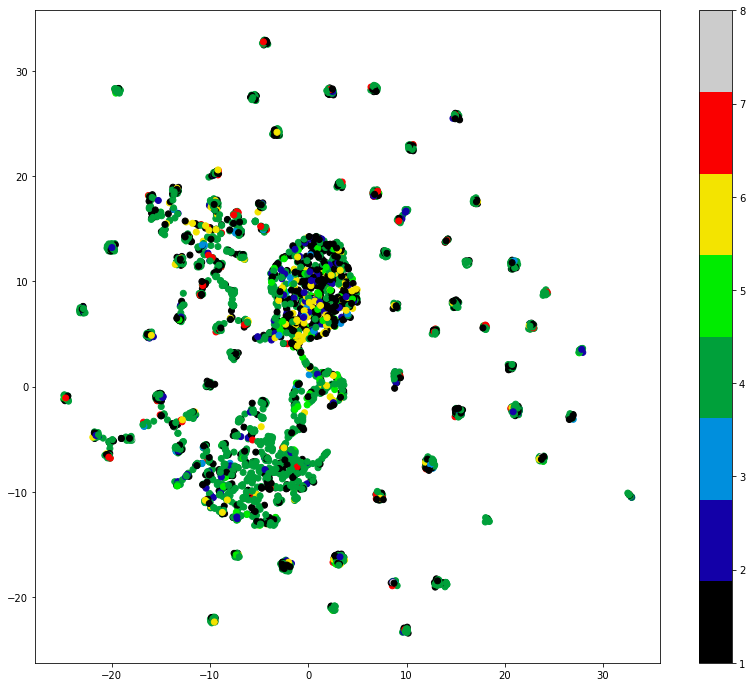

In [53]:
plt.figure(figsize=(14, 12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.get_cmap('nipy_spectral', 8))
plt.colorbar()
plt.show()

In [54]:
from sklearn.cluster import KMeans

In [55]:
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_reduced)

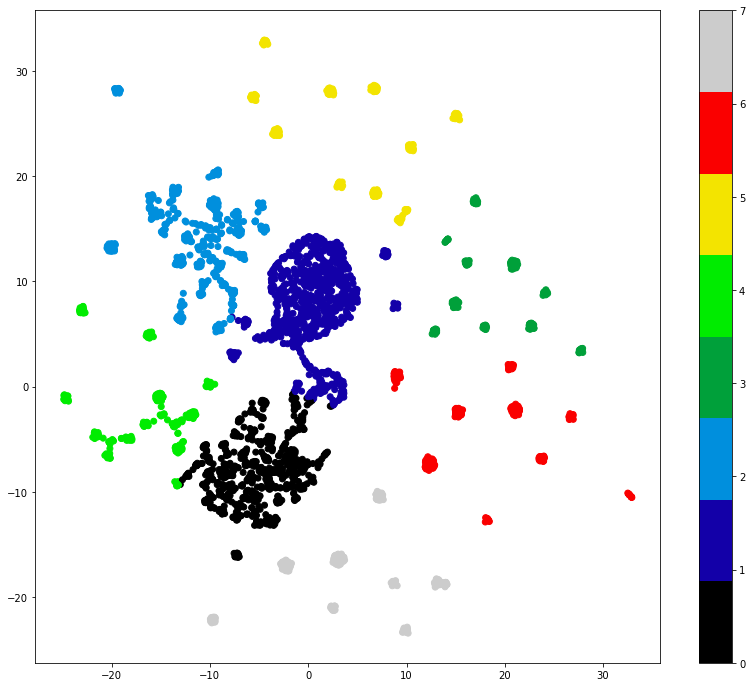

In [56]:
plt.figure(figsize=(14, 12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap=plt.cm.get_cmap('nipy_spectral', 8))
plt.colorbar()
plt.show()